In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.externals import joblib

C:\Users\rajas\Anaconda3\envs\adpteam3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data_file_path = "./data/"
model_file_path = "./models/"

In [3]:
data_files = listdir(data_file_path) 
data_files = [file for file in data_files if file.endswith('.xlsx')]
data_files 

['C001.xlsx',
 'C002.xlsx',
 'C003.xlsx',
 'C004.xlsx',
 'C005.xlsx',
 'C006.xlsx',
 'E001.xlsx',
 'E002.xlsx',
 'E003.xlsx',
 'E004.xlsx',
 'E005.xlsx',
 'E006.xlsx',
 'E007.xlsx',
 'E008.xlsx',
 'E020.xlsx',
 'E021.xlsx',
 'E030.xlsx',
 'E031.xlsx',
 'E032.xlsx',
 'E033.xlsx',
 'E034.xlsx',
 'E035.xlsx',
 'E036.xlsx',
 'F020.xlsx',
 'F021.xlsx',
 'F022.xlsx',
 'F023.xlsx',
 'F024.xlsx',
 'F031.xlsx',
 'F032.xlsx',
 'F033.xlsx',
 'F034.xlsx',
 'F035.xlsx',
 'H011.xlsx',
 'H012.xlsx',
 'H013.xlsx',
 'H014.xlsx',
 'H031.xlsx',
 'H032.xlsx',
 'H033.xlsx',
 'P010.xlsx',
 'P011.xlsx',
 'P012.xlsx',
 'P013.xlsx',
 'P014.xlsx',
 'P015.xlsx',
 'P016.xlsx',
 'P020.xlsx',
 'P021.xlsx',
 'P030.xlsx',
 'P031.xlsx',
 'P032.xlsx',
 'P033.xlsx',
 'P034.xlsx',
 'P035.xlsx',
 'P036.xlsx',
 'P037.xlsx',
 'P038.xlsx',
 'P039.xlsx',
 'P040.xlsx',
 'P041.xlsx',
 'P042.xlsx',
 'P043.xlsx',
 'P044.xlsx',
 'P045.xlsx',
 'P046.xlsx',
 'R001.xlsx',
 'R002.xlsx',
 'S010.xlsx',
 'S011.xlsx',
 'S012.xlsx',
 'S020

In [4]:
def pre_process_data(df) :
    '''
    This method preprocesses the loaded excel data by removing unwanted columns and map half-monthly to assigned number
    '''
    df = df.copy(deep=True)
    df.drop(columns=['item_number','reorder_qty', 'year_demand_var', 'month_demand_var'], axis=1, inplace=True)
    
    months = {'JAN0': 1, 'JAN1' : 2, 'FEB0': 3, 'FEB1' : 4, 'MAR0' : 5, 'MAR1' : 6, 'APR0' : 7, 'APR1' : 8, 'MAY0' : 9, 'MAY1' : 10, 'JUN0' : 11, 'JUN1' : 12,
             'JUL0' : 13, 'JUL1' : 14, 'AUG0' : 15, 'AUG1' : 16, 'SEP0' : 17, 'SEP1' : 18, 'OCT0' : 19, 'OCT1' : 20, 'NOV0' : 21, 'NOV1' : 22, 'DEC0' : 23, 'DEC1' : 24} 
    df.replace({'month':months}, inplace=True)
    df = df.astype({'month':int, 'year':int})
    
    df.sort_values(['year', 'month'], ascending=[True, True], inplace=True)  

    return df

In [5]:
def train_split_data(df) :
    '''
    This method splits given dataframes in to x_train, x_test, y_train, y_test
    '''
    x = df.drop('quantity', axis=1)
    y = df['quantity']
    x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=False, test_size=1/3)
    
    return x_train, x_test, y_train, y_test

In [6]:
def build_n_train_model(x_train,y_train,x_test,y_test, plot_graph):
    
    dtr = DecisionTreeRegressor(random_state = 0) 
    dtr.fit(x_train, y_train)
    
    y_pred = dtr.predict(x_test) 
    
    model_score = dtr.score(x_train,y_train)
    test_mse = mean_squared_error(y_test, y_pred)
    
    if plot_graph :
        plt.figure(figsize=(20,10))
        plt.plot(range(y_test.size), y_test, '-o', color = "green", label='Actual')
        plt.plot(range(y_pred.size), y_pred, '--o', color = "red", label='Predicted')
        plt.legend(loc="upper left", fontsize=16)
        plt.xticks([])
        plt.title("DecisionTreeRegression - Item Quantity (Actual vs Predicted)", fontsize=20)
        plt.xlabel("Year/Bi-Weekly", fontsize=20)
        plt.ylabel("Quantity", fontsize=20)
        plt.show()        
    
    return dtr, model_score, test_mse


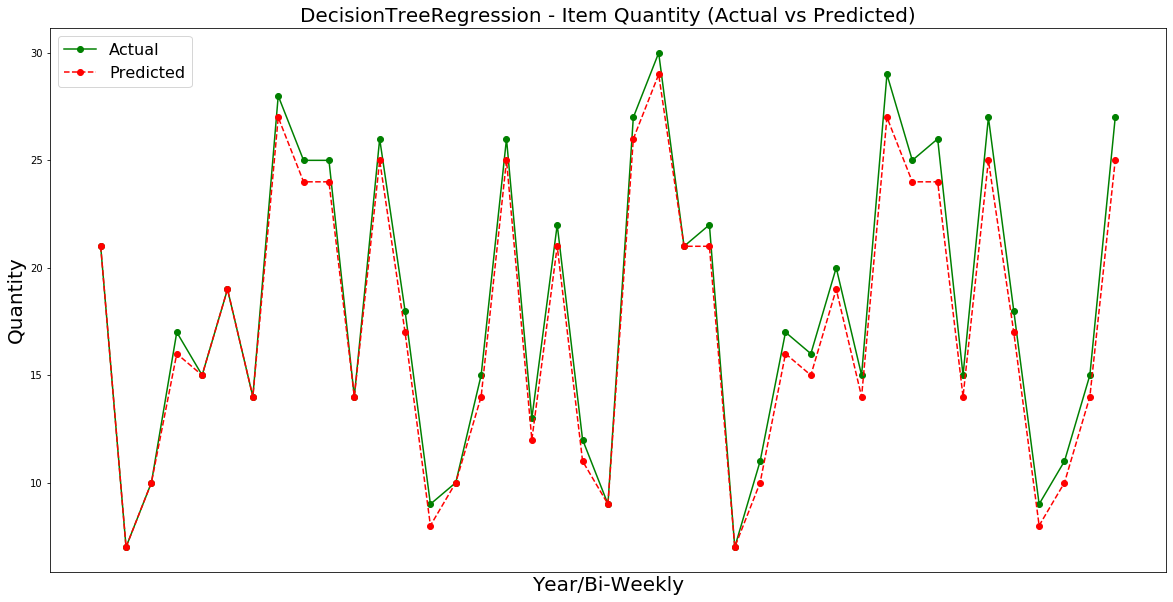

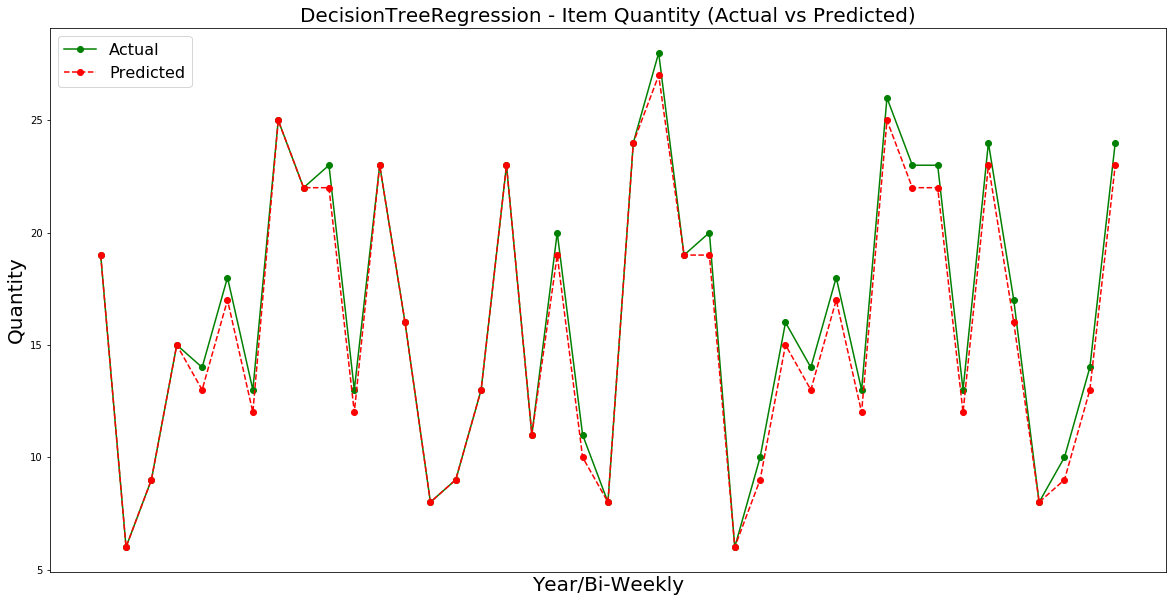

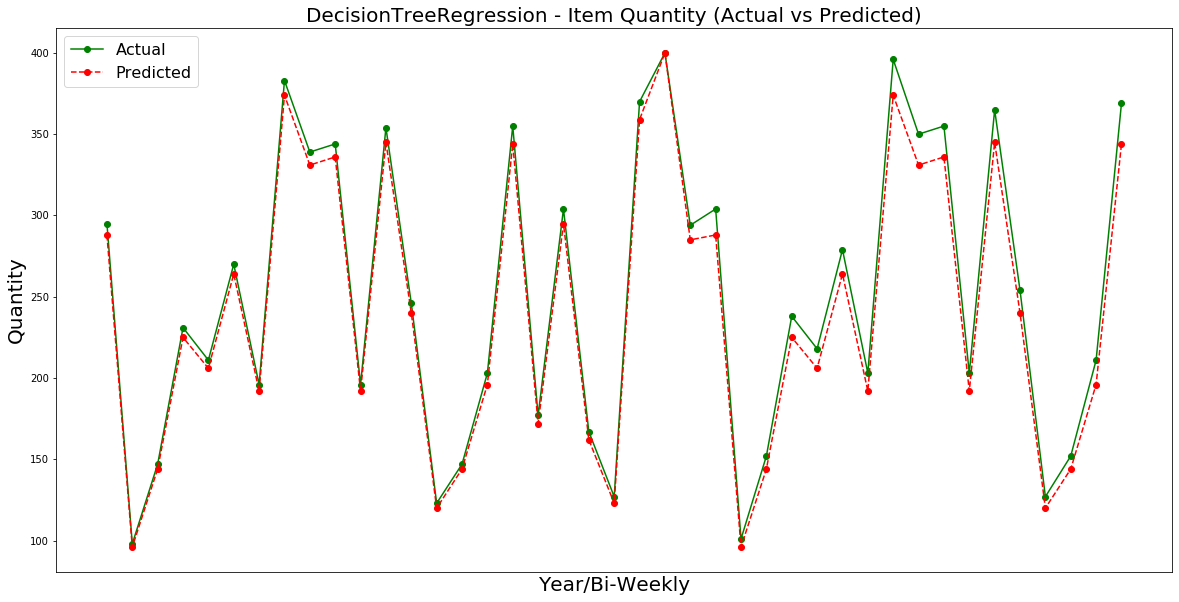

MSE for train :  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
MSE for test :  [1.024390243902439, 0.5609756097560976, 0.8780487804878049, 1.0975609756097562, 0.8048780487804879, 1.0731707317073171, 120.58536585365853, 134.1219512195122, 123.78048780487805, 123.63414634146342, 126.63414634146342, 127.3170731707317, 124.65853658536585, 111.82926829268293, 0.7073170731707317, 0.7073170731707317, 2.1707317073170733, 1.6097560975609757, 2.1951219512195124, 2.4390243902439024, 1.951219512195122, 2.073170731707317, 2.073170731707317, 1.951219512195122, 7.7073170731707314, 7.365853658536586, 17.70731

In [10]:
model_score = []
test_mse = []
plot_graph = True

for file_no, filename in enumerate(data_files) : 
    
    df = pd.read_excel(data_file_path + filename)  #load excel file
    df_inv = pre_process_data(df)
    x_train, x_test, y_train, y_test = train_split_data(df_inv)
    
    if file_no in [0,1,6] :
        plot_graph = True
    else :
        plot_graph = False
        
    model, mdl_scr, tst_mse = build_n_train_model(x_train,y_train,x_test,y_test, plot_graph)
    model_score.append(mdl_scr) 
    test_mse.append(tst_mse) 
    
    # save the model to disk
    joblib.dump(model, model_file_path + filename.replace('xlsx', 'joblib'))
    
print('MSE for train : ', model_score)
print('MSE for test : ', test_mse)
